In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('C:/Users/keyur/Desktop/keyur sem-6/ML/Practical-2/Housing.csv')
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


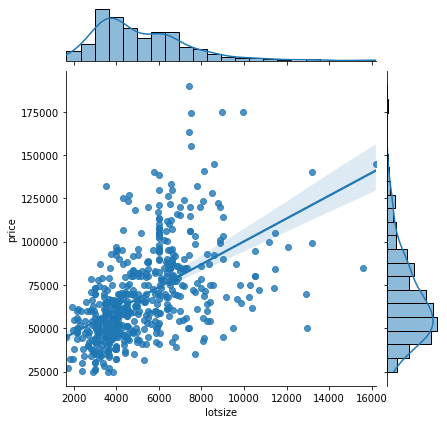

In [7]:
sns.jointplot(x=df['lotsize'], y=df['price'], data=df, kind='reg')

In [8]:
X= df[['lotsize']]

Y=df[['price']]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train=x_train['lotsize'].to_numpy()
x_test=x_test['lotsize'].to_numpy()
y_train=y_train['price'].to_numpy()
y_test=y_test['price'].to_numpy()


print('Train - Predictors shape', x_train.shape)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (436,)
Train - Predictors shape (436, 1)
Test - Predictors shape (110, 1)
Train - Target shape (436, 1)
Test - Target shape (110, 1)


In [10]:
cls = linear_model.LinearRegression()
cls.fit(x_train,y_train)

LinearRegression()

In [11]:
prediction = cls.predict(x_test)

In [12]:
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [13]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[6.88540888]]


In [14]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [33003.3621689]


In [15]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 543921224.5593488


In [16]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value 0.18583856088525574


Text(0.5, 1.0, 'Linear Regression')

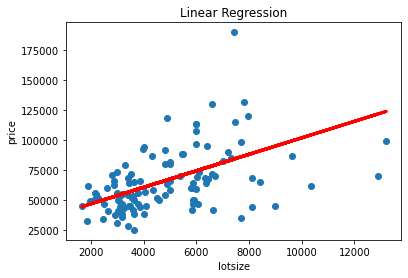

In [17]:
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('lotsize')
plt.ylabel('price')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

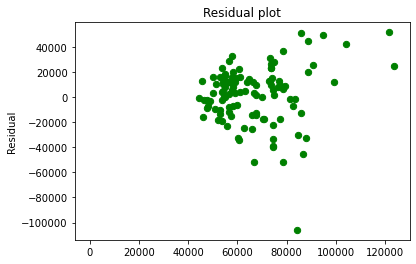

In [18]:
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')